# Paradoja de Simpson

Comentario del paper sobre causalidad en inteligencia artificial: 
Causality for Machine Learning - Bernhard Schölkopf (https://arxiv.org/abs/1911.10500)

Este sencillo notebook se crea para entender un poco mejor la paradoja de Simpson. Es uno de los problemas que ponen de relieve la necesidad de incorporar relaciones causales entre las variables en los modelos de inteligencia artificial para tener un mayor conocimiento del mundo y ser capaces  de llegar a las conclusiones correctas.

## Qué es la paradoja de Simpson
La paradoja de Simpson o efecto Yule-Simpson es una paradoja en la cual una tendencia que aparece en varios grupos de datos desaparece cuando estos grupos se combinan y en su lugar aparece la tendencia contraria para los datos agregados.

Fuente: https://es.wikipedia.org/wiki/Paradoja_de_Simpson


Para ello se crean dos distribuciones de datos aleatorias siguiendo ecuaciones lineales y añadiendo algo de ruido.  
Se pretende simular los datos de un estudio que muestra la relación entre las horas ejercitadas VS probabilidad de sufrir un ataque cardíaco.

In [45]:
import numpy as np
import pandas as pd

n_samples = 100
np.random.seed(42)
ages = np.random.randint(20, 50, n_samples)
hours = np.random.randint(1, 5, n_samples) + np.random.randn(n_samples)
p = 10 + 0.5 * ages  -2 * hours + np.random.randn(n_samples) *  2
under_50 = pd.DataFrame({'age': ages, 'Hours Exercised': hours, 'probability': p})

n_samples = 100
ages = np.random.randint(50, 85, n_samples)
hours = np.random.randint(3, 8, n_samples) + np.random.randn(n_samples) * 0.5
p = 15 + 0.5 * ages -2 * hours + np.random.randn(n_samples) 
over_50 = pd.DataFrame({'age': ages, 'Hours Exercised': hours, 'probability': p})

Generamos la gráfica con las dos distribuciones juntas sin diferenciarlas y las mostramos.
Vemos que  relación entre horas ejercitadas y probabilidad de sufrir un ataque cardíaco es positiva, y al mostrar la recta de regresión vemos que los datos nos sugieren esto.

Text(0, 0.5, 'Probability of Heart Attack')

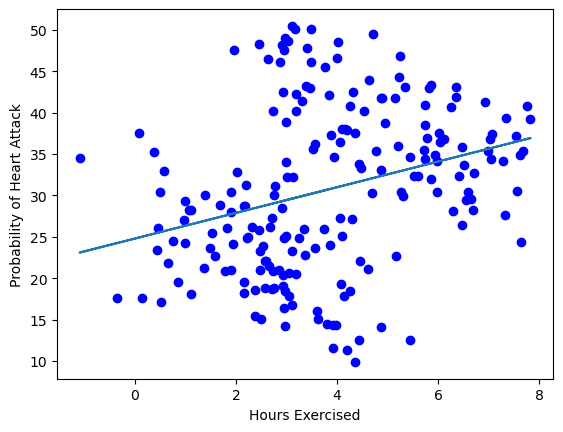

In [46]:
from turtle import color
import matplotlib.pyplot as plt
plt.scatter(under_50['Hours Exercised'], under_50['probability'], label='under 50', color='blue')
plt.scatter(over_50['Hours Exercised'], over_50['probability'], label='over 50', color='blue')

all_ages = pd.concat([under_50, over_50])

m, b = np.polyfit(all_ages['Hours Exercised'], all_ages["probability"], 1)
plt.plot(all_ages['Hours Exercised'], m*all_ages['Hours Exercised']+b)

#show axis labels
plt.xlabel('Hours Exercised')
plt.ylabel('Probability of Heart Attack')

## Agregando los datos por edad
Si no tuviéramos más contexto, deduciríamos que es cierto que a mayor ejercicio practicado, mayor probabilidad hay de sufrir un ataque.
Sin embargo, al estratificar estos datos por edad, separando los grupos de >50 años y los de <50, tenemos lo siguiente.

Vemos que, al analizar ambos grupos por separado, la relación que obtenemos es justo la contraria. A más ejercicio practicado, menor probabilidad hay de sufrir un ataque.

Esto muestra cómo en ocasiones, aplicar técnicas estadísticas sin conocimiento de los datos no nos lleva a las conclusiones acertadas. En este caso, la variable edad juega un papel muy relevante al intentar explicar cómo afecta el ejercicio a la probabilidad de sufrir un infarto.

Vemos que lo que realmente eleva la probabilidad de sufrir el ataque es la edad, a más edad, más riesgo. Pero sin embargo, realizar ejercicio físico hace que este riesgo disminuya en ambos grupos.

Text(0, 0.5, 'Probability of Heart Attack')

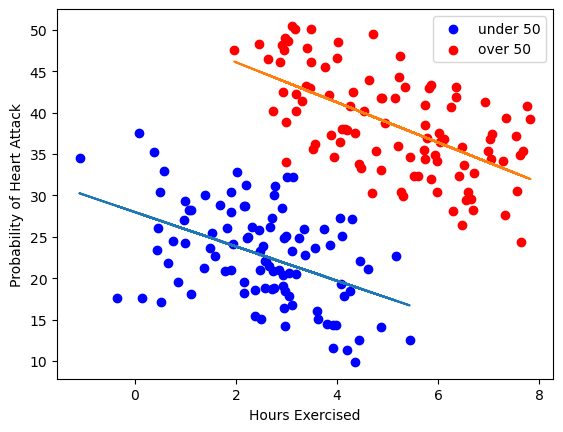

In [47]:
m1, b1 = np.polyfit(under_50['Hours Exercised'], under_50["probability"], 1)
plt.plot(under_50['Hours Exercised'], m1*under_50['Hours Exercised']+b1)

m2, b2 = np.polyfit(over_50['Hours Exercised'], over_50["probability"], 1)
plt.plot(over_50['Hours Exercised'], m2*over_50['Hours Exercised']+b2)

plt.scatter(under_50['Hours Exercised'], under_50['probability'], label='under 50', color='blue')
plt.scatter(over_50['Hours Exercised'], over_50['probability'], label='over 50', color='red')

#show legend
plt.legend()

#show axis labels
plt.xlabel('Hours Exercised')
plt.ylabel('Probability of Heart Attack')
